In [2]:
import numpy as np
import pandas as pd
from set_visualization import *

matplotlib imported
pyplot imported
seaborn imported
sns.set
sns.set_style(whitegrid)
sns.set_color_codes()
type (% matplotlib inline) if necessary
type (% config InlineBackend.figure_formats = {‘png’, ‘retina’}) if necessary


In [3]:
% matplotlib inline

In [5]:
weather = pd.read_csv('../../data/weather.csv', index_col=['station_nbr'])

In [6]:
print(weather.shape)
weather.loc[5].head()    # all missing data

(20517, 19)


,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
station_nbr,,,,,,,,,,,,,,,,,,,
5,2012-06-01,M,M,M,M,M,M,M,M,0411,1913,,M,M,M,M,M,M,M
5,2012-06-02,M,M,M,M,M,M,M,M,0411,1914,,M,M,M,M,M,M,M
5,2012-06-03,M,M,M,M,M,M,M,M,0410,1915,,M,M,M,M,M,M,M
5,2012-06-04,M,M,M,M,M,M,M,M,0410,1915,,M,M,M,M,M,M,M
5,2012-06-05,M,M,M,M,M,M,M,M,0409,1916,,M,M,M,M,M,M,M


In [7]:
weather = weather.drop(5)    # drop station_5
print(weather.shape)
weather.tail()

(19665, 19)


,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
station_nbr,,,,,,,,,,,,,,,,,,,
16,2014-10-31,53,34,44,M,35,41,21,0,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
17,2014-10-31,59,34,47,M,32,41,18,0,-,-,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,,0.0,0.00,29.78,30.28,10.6,36,11.2
19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20,2014-10-31,68,50,59,M,39,50,6,0,-,-,,0.0,0.00,29.57,30.27,10.5,36,11.2


# replace missing value with np.nan

In [8]:
for i in weather.columns:
    print(i, "\n", weather[i].unique())

date 
 ['2012-01-01' '2012-01-02' '2012-01-03' ..., '2014-10-29' '2014-10-30'
 '2014-10-31']
tmax 
 ['52' '48' '55' '63' '50' '66' '34' '73' '72' '38' '56' '59' '46' '45' '60'
 '44' '21' '65' '43' '53' '25' '32' '28' '62' '61' '47' '30' '26' '71' '58'
 '39' '54' '23' '27' '31' '68' '70' '67' '36' '69' '74' '75' '33' '51' '57'
 '41' '49' '76' '35' '77' '64' '40' '16' '37' '42' '14' '22' '13' '10' '20'
 '24' '80' '4' '11' '78' '17' '18' '79' '29' '81' '82' '83' '88' '87' '92'
 '89' '84' '85' '86' '90' '91' '94' '93' '96' '95' 'M' '97' '98' '101' '99'
 '100' '105' '103' '102' '106' '104' '109' '107' '108' '110' '111' '112'
 '114' '113' '19' '15' '12' '-1' '5' '8' '9' '1' '6' '2' '3' '7' '-2' '-11'
 '-4' '-6' '0']
tmin 
 ['31' '33' '34' '47' '45' '19' '53' '48' '18' '26' '30' '38' '40' '25' '41'
 '28' '24' '37' '36' '11' '16' '29' '22' '35' '15' '9' '21' '27' '10' '5'
 '32' '20' '3' '8' '44' '46' '17' '55' '43' '57' '50' '49' '54' '42' '39'
 '52' '23' '56' '14' '59' '-1' '12' '6' '4' '2' '

In [9]:
def codesum_character(codesum):
    if codesum == ' ':
        return "moderate"
    else:
        return codesum

In [10]:
weather['codesum'] = weather['codesum'].apply(codesum_character)

In [11]:
def compare_codesum(codesum):
    if codesum =="moderate":
        return codesum
    else:
        return "abnormal"

In [12]:
weather['codsum_Y/N'] = weather['codesum'].apply(compare_codesum)

In [13]:
for i in weather.columns:
    weather[i] = weather[i].replace('-', np.nan)
    weather[i] = weather[i].replace(' ', np.nan)
    weather[i] = weather[i].replace('M', np.nan)
    weather[i] = weather[i].replace('T', np.nan)
    weather[i] = weather[i].replace('  T', np.nan)

In [14]:
for i in weather.columns:
    print(i, "\n", weather[i].unique())

date 
 ['2012-01-01' '2012-01-02' '2012-01-03' ..., '2014-10-29' '2014-10-30'
 '2014-10-31']
tmax 
 ['52' '48' '55' '63' '50' '66' '34' '73' '72' '38' '56' '59' '46' '45' '60'
 '44' '21' '65' '43' '53' '25' '32' '28' '62' '61' '47' '30' '26' '71' '58'
 '39' '54' '23' '27' '31' '68' '70' '67' '36' '69' '74' '75' '33' '51' '57'
 '41' '49' '76' '35' '77' '64' '40' '16' '37' '42' '14' '22' '13' '10' '20'
 '24' '80' '4' '11' '78' '17' '18' '79' '29' '81' '82' '83' '88' '87' '92'
 '89' '84' '85' '86' '90' '91' '94' '93' '96' '95' nan '97' '98' '101' '99'
 '100' '105' '103' '102' '106' '104' '109' '107' '108' '110' '111' '112'
 '114' '113' '19' '15' '12' '-1' '5' '8' '9' '1' '6' '2' '3' '7' '-2' '-11'
 '-4' '-6' '0']
tmin 
 ['31' '33' '34' '47' '45' '19' '53' '48' '18' '26' '30' '38' '40' '25' '41'
 '28' '24' '37' '36' '11' '16' '29' '22' '35' '15' '9' '21' '27' '10' '5'
 '32' '20' '3' '8' '44' '46' '17' '55' '43' '57' '50' '49' '54' '42' '39'
 '52' '23' '56' '14' '59' '-1' '12' '6' '4' '2' '

# Data conversion to float

In [15]:
weather.columns

Index(['date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat',
       'cool', 'sunrise', 'sunset', 'codesum', 'snowfall', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       'codsum_Y/N'],
      dtype='object')

In [16]:
for col in weather[['tmax','tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 
                 'sunrise', 'sunset', 'snowfall', 'preciptotal', 'stnpressure','sealevel',
                 'resultspeed', 'resultdir', 'avgspeed']]:
    weather[col] = weather[col].astype(np.float64)
    
weather = pd.DataFrame(weather, columns=['date','tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat',
       'cool', 'sunrise', 'sunset', 'codesum','codsum_Y/N', 'snowfall', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed'])

### total np.nan count

In [17]:
print(len(weather))

for i in weather.columns:
    sum = weather[i].isnull().sum()
    print(i, "- null count :", sum, "(",(sum / 20517 * 100).round(2),"%",")")

19665
date - null count : 0 ( 0.0 % )
tmax - null count : 84 ( 0.41 % )
tmin - null count : 86 ( 0.42 % )
tavg - null count : 647 ( 3.15 % )
depart - null count : 10689 ( 52.1 % )
dewpoint - null count : 220 ( 1.07 % )
wetbulb - null count : 400 ( 1.95 % )
heat - null count : 647 ( 3.15 % )
cool - null count : 647 ( 3.15 % )
sunrise - null count : 9625 ( 46.91 % )
sunset - null count : 9625 ( 46.91 % )
codesum - null count : 0 ( 0.0 % )
codsum_Y/N - null count : 0 ( 0.0 % )
snowfall - null count : 6713 ( 32.72 % )
preciptotal - null count : 2448 ( 11.93 % )
stnpressure - null count : 77 ( 0.38 % )
sealevel - null count : 1277 ( 6.22 % )
resultspeed - null count : 143 ( 0.7 % )
resultdir - null count : 143 ( 0.7 % )
avgspeed - null count : 53 ( 0.26 % )


In [18]:
def vis_null_count():
    station_nbr = int(input())
    i = station_nbr
    dic = {}
    for j in weather.columns:
        sum = weather.loc[i][j].isnull().sum()
        print(j, "- null count :", sum, "(",(sum / 20517 * 100).round(2),"%",")")
        dic[j] = sum
    columns = list(dic.keys())
    counts = list(dic.values())
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 18
    fig_size[1] = 3
    # fig = plt.figure(size=(4, 2))
    plt.title('station number np.nan count')
    plt.bar(columns, counts )
    

### np.nan count on each station_nbr

4
date - null count : 0 ( 0.0 % )
tmax - null count : 2 ( 0.01 % )
tmin - null count : 2 ( 0.01 % )
tavg - null count : 10 ( 0.05 % )
depart - null count : 41 ( 0.2 % )
dewpoint - null count : 8 ( 0.04 % )
wetbulb - null count : 15 ( 0.07 % )
heat - null count : 10 ( 0.05 % )
cool - null count : 10 ( 0.05 % )
sunrise - null count : 31 ( 0.15 % )
sunset - null count : 31 ( 0.15 % )
codesum - null count : 0 ( 0.0 % )
codsum_Y/N - null count : 0 ( 0.0 % )
snowfall - null count : 13 ( 0.06 % )
preciptotal - null count : 96 ( 0.47 % )
stnpressure - null count : 4 ( 0.02 % )
sealevel - null count : 19 ( 0.09 % )
resultspeed - null count : 7 ( 0.03 % )
resultdir - null count : 7 ( 0.03 % )
avgspeed - null count : 2 ( 0.01 % )


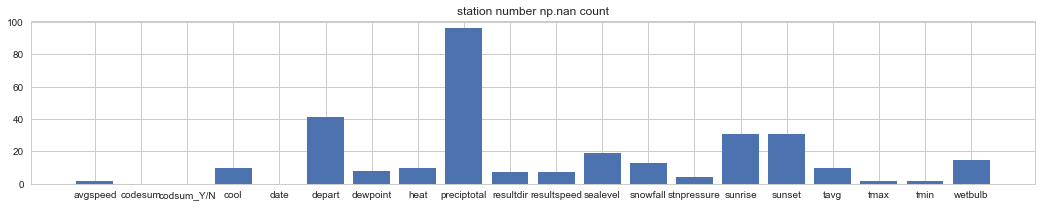

In [19]:
vis_null_count()

* * * *

## Missing Data에 대한 생각



1번 유형 - 바로 이전 날의 데이터를 참조
- tmax
- tmin
- tavg
- dewpoint
- wetbulb
- heat
- cool
- snowfall
- preciptotal
- stnpressure
- sealevel
- resultspeed
- reusltdir
- avgspeed

2번 유형 - null값의 비율이 지나치게 높다
- depart
- sunrise
- sunset
    - (1) 전날 데이터 참조
    - (2) 평균치

## Missing Data를 채워넣는 방법 고민

- `tavg` = (`tmax` + `tmin` / 2) 반올림


- `heat` = 65 - `tavg`   (난방 지수)
- `cool` = `tavg` + 65   (냉방 지수)
        - 기준 온도 화씨 65도 (18도) (참조 : https://www.wunderground.com/about/faq/degreedays.asp)


- `depart` = 아직 채워 넣을 아이디어 없음 ... (1)56%, (2)유추할 수 있는 [지난 30년의 평균 온도값] 없음
- `sunrise-sunset` = 아직 채워 넣을 아이디어 없음 (1)47%  (2)유추할 수 있는 기준 값 모르겠음


- `wetbulb 습도` = dewpoint < 습도 < wetbulb 
- `dewpoint 이슬점` = 
        - tavg(dry bulb), 기압(pressure), 습도(wetbulb), 이슬점(dew point)을 대입해서 값을 구할 수 있다. 
		- eda_weather_calculation 을 통해 시도
        - http://www.ringbell.co.uk/info/humid.htm
        - http://www.reahvac.com/tools/humidity-formulas/

- `snowfall` = codesum에 `SN SG GS PL IC UP`(눈에 관련된) 발생 시 평균값 입력
- `preciptotal` = codesumd에 `+FC TH GR UP DZ RA SH` rainfall 뿐만 아니라 melted snow라는 특성까지 포함하고 있기 때문에 전 날을 참조


- 'station pressure 기압'
- `sealevel 해면기압` = 해면기압을 구하기 위해서는 기압과 "고도"가 필요한데, station_nbr에 대한 위치 정보가 없으니. 잘 모르겠음 

In [20]:
weather1 = weather.reset_index(drop=False)

In [21]:
weather1.set_index(['date', 'station_nbr'], inplace=True)

In [22]:
weather1.describe()

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
count,19581.000000,19579.000000,19018.000000,8976.000000,19445.000000,19265.000000,19018.000000,19018.000000,10040.000000,10040.000000,12952.000000,17217.000000,19588.000000,18388.000000,19522.000000,19522.000000,19612.000000
mean,71.621010,50.651719,61.238301,1.366533,47.443610,53.888243,9.712798,5.951099,589.489243,1826.954980,0.045012,0.114673,29.162770,30.008704,6.406490,18.676365,7.910820
std,19.860523,19.151364,19.207381,7.651024,19.362215,17.017772,13.852154,7.837831,88.713201,89.661445,0.506155,0.364658,1.245414,0.190385,4.163851,9.671965,3.934184
min,-11.000000,-21.000000,-16.000000,-35.000000,-24.000000,-15.000000,0.000000,0.000000,406.000000,1611.000000,0.000000,0.000000,23.720000,29.160000,0.000000,1.000000,0.000000
25%,59.000000,37.000000,48.000000,-3.000000,33.000000,42.000000,0.000000,0.000000,529.000000,1748.000000,0.000000,0.000000,29.110000,29.890000,3.200000,13.000000,5.100000
50%,76.000000,53.000000,65.000000,2.000000,51.000000,57.000000,0.000000,0.000000,605.000000,1835.000000,0.000000,0.000000,29.410000,30.000000,5.600000,18.000000,7.300000
75%,87.000000,67.000000,77.000000,6.000000,64.000000,68.000000,17.000000,12.000000,648.000000,1915.000000,0.000000,0.020000,29.780000,30.120000,8.800000,26.000000,10.100000
max,114.000000,88.000000,100.000000,33.000000,77.000000,80.000000,81.000000,35.000000,740.000000,1949.000000,16.200000,7.360000,30.610000,30.800000,28.400000,36.000000,28.700000


In [337]:
weather1.loc['2012-01-01']

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,codsum_Y/N,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
station_nbr,,,,,,,,,,,,,,,,,,,
1,52.0,31.0,42.0,NaN,36.0,40.0,23.0,0.0,NaN,NaN,RA FZFG BR,abnormal,NaN,0.05,29.78,29.92,3.6,20.0,4.6
2,48.0,33.0,41.0,16.0,37.0,39.0,24.0,0.0,716.0,1626.0,RA,abnormal,0.0,0.07,28.82,29.91,9.1,23.0,11.3
3,55.0,34.0,45.0,9.0,24.0,36.0,20.0,0.0,735.0,1720.0,moderate,moderate,0.0,0.00,29.77,30.47,9.9,31.0,10.0
4,63.0,47.0,55.0,4.0,28.0,43.0,10.0,0.0,728.0,1742.0,moderate,moderate,0.0,0.00,29.79,30.48,8.0,35.0,8.2
6,63.0,34.0,49.0,0.0,31.0,43.0,16.0,0.0,727.0,1742.0,moderate,moderate,0.0,0.00,29.95,30.47,14.0,36.0,13.8
7,50.0,33.0,42.0,NaN,26.0,35.0,23.0,0.0,NaN,NaN,moderate,moderate,0.0,0.00,29.15,30.54,10.3,32.0,10.2
8,66.0,45.0,55.5,NaN,34.0,46.0,NaN,NaN,NaN,NaN,RA BR,abnormal,NaN,0.00,30.05,NaN,11.0,36.0,10.9
9,34.0,19.0,27.0,NaN,17.0,23.0,38.0,0.0,NaN,NaN,UP,abnormal,NaN,NaN,29.34,30.09,22.8,30.0,22.5
10,73.0,53.0,63.0,NaN,55.0,58.0,2.0,0.0,723.0,1738.0,FG+ FG BR,abnormal,NaN,0.00,30.16,30.19,5.1,24.0,5.5


### `tavg` np.nan 처리

In [53]:
weather = weather1.reset_index(drop=False)
weather.head(8)

,date,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,sunset,codesum,codsum_Y/N,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2012-01-01,1,52.0,31.0,42.0,NaN,36.0,40.0,23.0,0.0,...,NaN,RA FZFG BR,abnormal,NaN,0.05,29.78,29.92,3.6,20.0,4.6
1,2012-01-01,2,48.0,33.0,41.0,16.0,37.0,39.0,24.0,0.0,...,1626.0,RA,abnormal,0.0,0.07,28.82,29.91,9.1,23.0,11.3
2,2012-01-01,3,55.0,34.0,45.0,9.0,24.0,36.0,20.0,0.0,...,1720.0,moderate,moderate,0.0,0.00,29.77,30.47,9.9,31.0,10.0
3,2012-01-01,4,63.0,47.0,55.0,4.0,28.0,43.0,10.0,0.0,...,1742.0,moderate,moderate,0.0,0.00,29.79,30.48,8.0,35.0,8.2
4,2012-01-01,6,63.0,34.0,49.0,0.0,31.0,43.0,16.0,0.0,...,1742.0,moderate,moderate,0.0,0.00,29.95,30.47,14.0,36.0,13.8
5,2012-01-01,7,50.0,33.0,42.0,NaN,26.0,35.0,23.0,0.0,...,NaN,moderate,moderate,0.0,0.00,29.15,30.54,10.3,32.0,10.2
6,2012-01-01,8,66.0,45.0,NaN,NaN,34.0,46.0,NaN,NaN,...,NaN,RA BR,abnormal,NaN,0.00,30.05,NaN,11.0,36.0,10.9
7,2012-01-01,9,34.0,19.0,27.0,NaN,17.0,23.0,38.0,0.0,...,NaN,UP,abnormal,NaN,NaN,29.34,30.09,22.8,30.0,22.5


In [54]:
weather.loc[6, 'tavg']

nan

In [55]:
np.isnan(weather.loc[6, 'tavg'])

True

In [56]:
for i in range(len(weather)):
    if np.isnan(weather.loc[i, 'tavg']) == True :
        weather.loc[i, 'tavg'] = ((weather.loc[i, 'tmax'] + weather.loc[i, 'tmin']) / 2).round()

In [57]:
weather.loc[6, 'tavg']

56.0

In [61]:
weather[np.isnan(weather['snowfall']) == True]

,date,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,sunset,codesum,codsum_Y/N,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2012-01-01,1,52.0,31.0,42.0,NaN,36.0,40.0,23.0,0.0,...,NaN,RA FZFG BR,abnormal,NaN,0.05,29.78,29.92,3.6,20.0,4.6
6,2012-01-01,8,66.0,45.0,56.0,NaN,34.0,46.0,NaN,NaN,...,NaN,RA BR,abnormal,NaN,0.00,30.05,NaN,11.0,36.0,10.9
7,2012-01-01,9,34.0,19.0,27.0,NaN,17.0,23.0,38.0,0.0,...,NaN,UP,abnormal,NaN,NaN,29.34,30.09,22.8,30.0,22.5
8,2012-01-01,10,73.0,53.0,63.0,NaN,55.0,58.0,2.0,0.0,...,1738.0,FG+ FG BR,abnormal,NaN,0.00,30.16,30.19,5.1,24.0,5.5
11,2012-01-01,13,38.0,18.0,28.0,NaN,12.0,21.0,37.0,0.0,...,NaN,moderate,moderate,NaN,0.00,24.60,30.59,2.5,16.0,6.1
14,2012-01-01,16,50.0,30.0,40.0,NaN,37.0,40.0,25.0,0.0,...,NaN,RA MIFG BR,abnormal,NaN,NaN,29.80,29.89,4.2,21.0,6.8
19,2012-01-02,1,50.0,31.0,41.0,NaN,26.0,35.0,24.0,0.0,...,NaN,moderate,moderate,NaN,0.01,29.44,29.62,9.8,24.0,10.3
20,2012-01-02,2,46.0,28.0,37.0,12.0,24.0,32.0,28.0,0.0,...,1627.0,moderate,moderate,NaN,0.01,28.51,29.62,12.7,26.0,13.3
25,2012-01-02,8,59.0,36.0,48.0,NaN,29.0,40.0,NaN,NaN,...,NaN,moderate,moderate,NaN,0.00,30.25,NaN,6.2,36.0,6.7
26,2012-01-02,9,21.0,11.0,16.0,NaN,8.0,15.0,49.0,0.0,...,NaN,SN UP,abnormal,NaN,NaN,29.67,30.44,14.4,32.0,14.7


# fill null data

In [ ]:
weather2 = weather
print(weather2.columns)
weather2.head()

### 1번 유형

In [ ]:
def isnan(columns):
    for i in range(len(columns)):
        if np.isnan(columns[i]) == True:
            columns[i] = 0.0
        elif np.isnan(i) == False:
            pass
    return columns

In [ ]:
snowfall = isnan(list(weather2['snowfall']))
weather2['snowfall'] = snowfall

In [ ]:
preciptotal = isnan(list(weather2['preciptotal']))
weather2['preciptotal'] = preciptotal

In [ ]:
print(weather2['snowfall'].isnull().sum()) 
print(weather2['preciptotal'].isnull().sum())

## 2번 유형

In [ ]:
weather2 = weather2.sort_values(['station_nbr', 'date']).reset_index(drop=True)

In [ ]:
weather2

In [ ]:
def replace(columns):
    columns = list(columns)
    for i in range(len(columns)):
        if np.isnan(columns[i]) == True:
            columns[i] = columns[i-1]
    return columns

def replace_all():
    for col in weather2[['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat',
       'cool', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed']]:
        weather2[col] = replace(weather2[col])

In [ ]:
replace_all()

In [ ]:
print(weather2['tmin'].isnull().sum()) 

In [ ]:
weather2 = weather2.set_index(['station_nbr'])

In [ ]:
weather2.head()

In [ ]:
weather2.to_csv('../data/weather_ver2')

In [ ]:
weather = pd.read_csv('../data/weather_ver2', index_col=0)

In [ ]:
weather

# Merge

In [ ]:
data.head()

In [ ]:
weather2.head()

In [ ]:
data.merge(weather2, left_on='date', right_on='date', how = 'outer')

In [ ]:
data

# Identify Outlier (units over 1000)

### 평일, 휴일, 특이 날씨 사항, 발견 되지 않았습니다. outlier로 판단.

In [ ]:
# data = data[data['units']>0].reset_index(drop=True)

In [ ]:
outlier_1 = data[data['units']>1000]

In [ ]:
outlier_1

In [ ]:
data.drop(2503831, inplace = True)
data.drop(2700301, inplace = True)

In [ ]:
data[data['units']>1000]

In [ ]:
data = data.reset_index(drop = True)

In [ ]:
data.head()